In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np
from spectacle.analysis.metrics import correlate, npcorrelate, cross_correlate, autocorrelate
from uncertainties import unumpy as unp

In [2]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [12, 12]
# plt.rcParams["figure.dpi"] = 80

How the correlation function changes with standard deviation of the Gaussian distribution of noise values.

In [3]:
f, (ax) = plt.subplots()

delta_lambda_range = np.linspace(-1000, 100, 3)
delta_v_range = [-1e8, 0.0, 1e8]
v_doppler_range = np.logspace(7, 9, 3)
column_density_range = np.logspace(14, 16, 3)

# Define the noise range
noise_range = np.linspace(0.0, 1.0, 20)
corr_vals = []
corr_err_vals = []
dispersion = np.linspace(0, 2000, 2000)

# Create spectrum objects
spectrum_model1 = Absorption1D()
spectrum_model1.add_line(name="HI1216", 
                         v_doppler=1e8, 
                         column_density=10**14.66)

spectrum1 = spectrum_model1(dispersion)

# uncert = np.random.sample(spectrum1.flux.size) * 0.1

for noise_level in noise_range:
    spectrum_model2 = Absorption1D()
    spectrum_model2.add_line(name="HI1216", 
                             v_doppler=1e8, 
                             column_density=10**14.66)
    
    spectrum2 = spectrum_model2(dispersion)
    
    spectrum2.add_noise(std_dev=noise_level)
    spectrum2.uncertainty = np.sqrt(spectrum2.data)

    corr, corr_err, use_mask = correlate(spectrum1, spectrum2)
    corr = unp.uarray(corr, corr_err)
    corr_sum = corr.sum()
    
    corr_vals.append(corr_sum.nominal_value)
    corr_err_vals.append(corr_sum.std_dev)
    
corr_vals = np.array(corr_vals)
corr_err_vals = np.array(corr_err_vals)

ax.plot(noise_range, corr_vals)
ax.fill_between(noise_range, corr_vals - corr_err_vals, corr_vals + corr_err_vals, alpha=0.5)
ax.set_xlabel("Standard deviation of normal distribution")
ax.set_ylabel("Correlation")
# ax.plot(spectrum2.velocity(mask=use_mask), spectrum2.flux[use_mask], 'r--')
# ax.set_title(np.sum(corr))

f.tight_layout()

<IPython.core.display.Javascript object>

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


KeyboardInterrupt: 

Difference between noiseless and noisiest spectra.

<IPython.core.display.Javascript object>


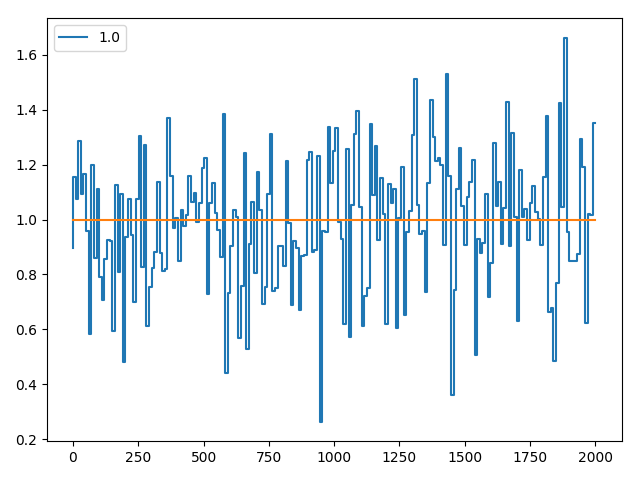

ERROR:root:No line with name H1216 found.
ERROR:root:No line with name H1216 found.


In [4]:
f, (ax) = plt.subplots()

spectrum_model1 = Absorption1D()
spectrum_model1.add_line(name="H1216", 
                   v_doppler=1e8, 
                   column_density=10**14.66)

spectrum1 = spectrum_model1(np.linspace(0, 2000, 200))

spectrum_model2 = Absorption1D()
spectrum_model2.add_line(name="H1216", 
                   v_doppler=1e8, 
                   column_density=10**14.66)

spectrum2 = spectrum_model2(np.linspace(0, 2000, 200))
spectrum2.add_noise(std_dev=0.25)

ax.step(spectrum2.dispersion, spectrum2.data, label=noise_level)

ax.step(spectrum1.dispersion, spectrum1.data)
ax.legend(loc=0)

f.tight_layout()